In [27]:
from dataclasses import replace
import numpy as np
import matplotlib.pyplot as plt
from slicereg.models.atlas import Atlas
from slicereg.models.transforms import Plane3D
from slicereg.repos.atlas_repo import BrainglobeAtlasRepo
from scipy import ndimage


## Load Atlas

In [3]:
repo = BrainglobeAtlasRepo()
atlas = repo.load_atlas(resolution=25)
atlas

Atlas(volume=array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 1, 0],
        ...,
        [0, 1, 1, ..., 1, 1, 1],
        [0, 1, 1, ..., 1, 1, 1],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 1, 1, 0],
        ...,
        [0

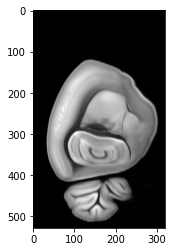

In [34]:
slice_plane = Plane3D(z=100)
section = atlas.slice(slice_plane)
section
plt.imshow(section.image.channels[0], cmap='gray');

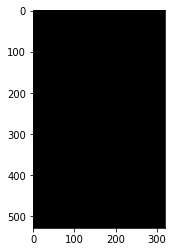

In [4]:
slice_plane = Plane3D(y=100, rz=90)
section = atlas.slice(slice_plane)
section
plt.imshow(section.image.channels[0], cmap='gray');

In [33]:
section.image.channels.shape, atlas.volume.shape

((1, 528, 320), (528, 320, 456))

In [30]:
%%time
atlas.slice(slice_plane)

Wall time: 31 s


Section(image=ImageData(pixel_resolution_um=25.0), plane_2d=Plane2D(x=0.0, y=0.0, theta=0.0), plane_3d=Plane3D(x=0.0, y=0.0, z=10, rx=0.0, ry=0.0, rz=0.0), thickness_um=25.0, id=UUID('e944aa0e-336c-4dcb-b524-c5b9ba789cd6'))

In [23]:
%%timeit
transform = np.eye(4)
result = ndimage.affine_transform(atlas.volume, transform)

31.9 s ± 3.62 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%%timeit
aa = atlas.volume.copy()


73.9 ms ± 2.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
bb = %timeit -n 1 -r 1 -o print('hi')
bb.average

hi
70.3 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


7.030000006125192e-05

## Profile Slicing: Data Size / Time

Get a sense of why this takes so long: Make the volume smaller and time it, storing how many bytes the array takes up
and its' slicing time

In [ ]:
times = {}
for step_size in range(1, 10):
    atlas2 = replace(atlas, volume=atlas.volume[::step_size, ::step_size, ::step_size])
    time = %timeit -n 1 -r 1 -o atlas2.slice(slice_plane)
    times[atlas2.volume.nbytes] = time.average

times

Plot the results

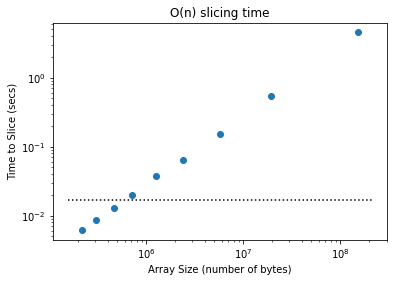

In [42]:
plt.loglog(times.keys(), times.values(), "o")
plt.xlabel("Array Size (number of bytes)")
plt.ylabel("Time to Slice (secs)")
plt.title("O(n) slicing time")
plt.hlines([1/60], *plt.gca().get_xlim(), 'k', linestyles="dotted", label="Interactive-speed of slicing.")
